## Data Pre-Processing.

In [44]:
# Importing libraries to be used.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold
import pickle

In [45]:
df = pd.read_csv('diabetes_data_upload.csv')

In [46]:
# Changing Postive to 1 and Negative to  in the 'Class' column
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [47]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [48]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [49]:
#Label Encoding for object to numeric conversion and hence the data types will change to int64
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [50]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [51]:
# Correlation between the features.
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

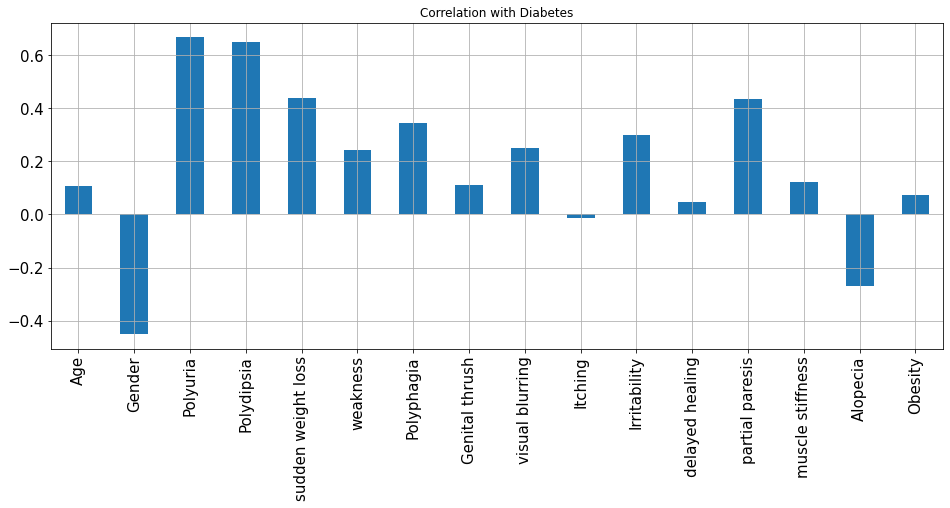

In [52]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [53]:
# using Binarizer to change Age values to binary values.
bin = Binarizer(threshold=35)
col = X['Age'].values
col = col.reshape(-1, 1)
bin.fit_transform(col)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [54]:
# all binary values
X['Age'] = bin.fit_transform(col)
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


## Train and Test Split.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [56]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    258
0    158
Name: class, dtype: int64
Distribution of target variable in test set
1    62
0    42
Name: class, dtype: int64


In [57]:
# Feature Selection.
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [60]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# Building the models for prediction.

In [61]:
# Spot-Checking Algorithms to use
models = []
models.append(( 'Logistic Regression' , LogisticRegression()))
models.append(( 'Random Forest classifier' , RandomForestClassifier()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree classifier' , DecisionTreeClassifier()))
models.append(( 'Naive Bayes Gaussian' , GaussianNB()))
models.append(( 'SVM' , SVC()))
# evaluating each model in turn, using 10-fold cross validation to estimate accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
# Output are mean and starndard deviation accuracies.
results = []
names = []
for name, model in models:
    seed = 7
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy' )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.922880 (0.052989)
Random Forest classifier: 0.976074 (0.026083)
KNN: 0.922764 (0.046174)
Decision Tree classifier: 0.971254 (0.029805)
Naive Bayes Gaussian: 0.891696 (0.052544)
SVM: 0.959350 (0.039910)


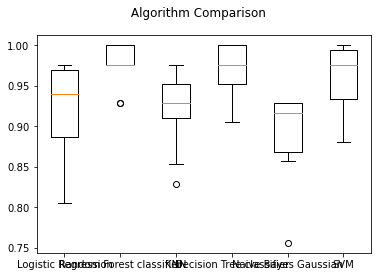

In [62]:
# Algorithm comparison on the spread and mean accuracy for each model.
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9519230769230769
[[38  4]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.94      0.98      0.96        62

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



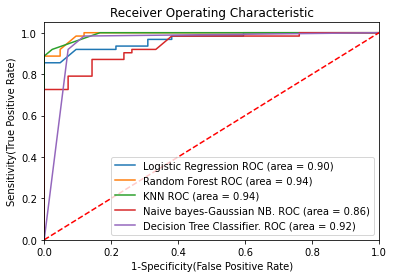

In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# models to the list to be viewed on the ROC plot
models = [
    {
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
    },

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
    },
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=7),
    },
    
    {
    'label': 'Naive bayes-Gaussian NB.',
    'model':  GaussianNB(),
    },
    
    {
    'label': 'Decision Tree Classifier.',
    'model':  DecisionTreeClassifier(),
    },
    
    
    
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:
file = open('RF.pkl', 'wb')
pickle.dump(RF, file)
file.close()